### Hubble's law and the age of the Universe


### Φορτώνουμε βιβλιοθήκες

In [1]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt # Matplotlib is the standard library for making plots
plt.rcParams['figure.figsize'] = [14, 8] # This is a global Matplotlib parameters for the default figure size
from scipy.optimize import curve_fit 
# in case you opened this file from the wrong directory
#import os  
#cwd=os.getcwd(); print(cwd)
#path='/Users/labuser...'
#os.chdir(path)


### Μετρήσεις 

In [27]:
#(ADD YOUR OWN MEASUREMENTS FOR AS MANY GALAXIES AS DESIRED, ONE LINE AT A TIME

data=np.array([
[1.182, 0.1, 3962.2, 3997.,6608.2], #NGC1357
[1.605,0.2,3959.8,3995.5,6606.7],
[0.982,0.05,3965.3,3996.2,6614],
]).T

angular_diameter = data[0] *1e-3
angular_diameter_error = data[1] *1e-3
lambda_obs_CaK = data[2]
lambda_obs_CaH = data[3]
lambda_obs_Ha = data[4]


Σημείωση για γωνιακά μεγέθη
Υποθέτουμε ότι η διάμετρος ενός γαλαξία στον ουρανό είναι $d$ ($d\simeq 22\,\mathrm{kpc}$)

Για πολύ μικρή γωνία $\alpha$ μπορούμε να χρησιμποιήσουμε την $\tan \alpha \sim \alpha$
άρα
$$
\tan \alpha \sim \alpha = \frac{d}{D} \rightarrow  D=\frac{d}{\alpha}
$$

**ΠΡΟΣΟΧΗ: Υποθέτουμε Ευκλείδια κοσμολογία, ισχύει για πολύ κοντινούς μόνο!**

In [41]:
d_galaxy=22. #intrinsic diameter in kpc
distance = d_galaxy / angular_diameter # kpc
distance /= 1000. # to Mpc

distance_error = d_galaxy / angular_diameter**2 * angular_diameter_error # kpc
distance_error /= 1000. # to Mpc

print(distance, distance_error)

[18.61252115 13.70716511 22.40325866] [1.57466338 1.70805796 1.14069545]


### Eρυθρομετατόπιση
Λόγω του φαινομένου Doppler μια γραμμή εκπομπής (ή απορρόφησης) μετατοπίζεται από τη εργαστηριακή της τιμή $\lambda _\mathrm{emit}$ κατα $\delta \lambda=\lambda _\mathrm{obs}- \lambda _\mathrm{emit}$. 

Η σχετική ταχύτητα μπορεί να υπολογιστεί από τη σχέση $V=z c $ όπου $z$ ορίζουμε τη ποσότητα $ z=\frac{\delta \lambda}{\lambda _\mathrm{emit}}$, άρα

$$
V=c \frac{\delta \lambda}{\lambda _\mathrm{emit}}
$$

Εργαστηριακές τιμές: γραμμή Ca K = 3933.7 A, Ca H = 3968.5 A και Ha = 6562.8 A



In [37]:
def compute_redshift(lambda_obs,lambda_emit): return (lambda_obs-lambda_emit)/lambda_emit
    
z_CaK=compute_redshift(lambda_obs_CaK,3933.7)
z_CaH=compute_redshift(lambda_obs_CaH,3968.5)
z_Ha=compute_redshift(lambda_obs_Ha, 6562.8)

z_mean=(z_CaK+z_CaH+z_Ha)/3.

# In case you have nan's in your data you can use nanmean function which calculates the mean without taking care the nan values
# z_mean=np.nanmean([z_CAK,z_CAH,z_Ha],axis=0)
# z_std=np.nanstd([z_CAK,z_CAH,z_Ha],axis=0)

c=2.9979e5 #km/s
v=c*z_mean 
print(v)



[2132.9479968  2011.3681461  2279.86945485]


slope = (0.031 +/- 0.004) km/s/Mpc


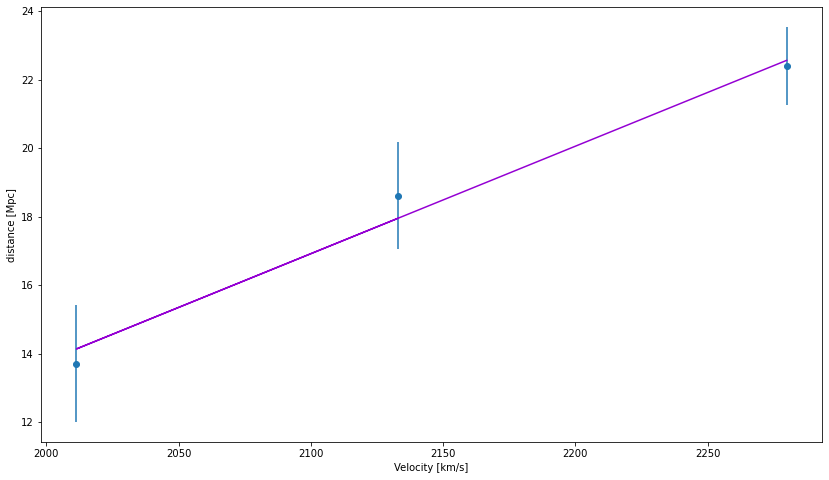

In [58]:
plt.errorbar(v,distance, yerr=distance_error,fmt='o')
plt.ylabel('distance [Mpc]')
plt.xlabel('Velocity [km/s]')


def line(x,const,slope): return (const+slope*x)
popt, pcov = curve_fit(line, v, distance, sigma=distance_error)

const=popt[0]
slope=popt[1]
dpopt=np.sqrt(np.diag(pcov)) 

#print(f"const = ({popt[0]:.1f} +/- {dpopt[0]:.2f}) km/s")
print(f"slope = ({slope:.3f} +/- {dpopt[1]:.3f}) km/s/Mpc") 

# plot the best fit model
plt.plot(v,const+slope*v,label='best line',color='darkviolet')


### Εκτίμηση μιας (ελάχιστης) ηλικίας του Σύμπαντος
Προκύπτει από την απόσταση δια την ταχύτητα του μακρυνότερου γαλαξία, εφόσον το φως πήρε τόσο χρόνο να ταξιδέψει από εκεί σε ένα Ευκλειδιο, γραμμικό Σύμπαν. Επίσης προκύπτει από την κλίση του παραπάνω γραφήματος, θεωρώντας ότι η ευθεία περνάει από το μακρυνότερο γαλαξία. 
Προσοχή στις μονάδες: 1 Mpc = 3.09e19 km και 1s = 3.17e-17 Gyrs
άρα 1 Mpc/(km/s) = 978 Gyrs

In [71]:
print("A rough estimate of the age of the Universe from the most distant galaxy [Gyrs]:",23/2250.*978)
print("Likewise, from the slope [Gyrs]:",slope*978)
#print(f"{age_of_universe:.2E} yrs")

A rough estimate of the age of the Universe from the most distant galaxy [Gyrs]: 9.997333333333334
Likewise, from the slope [Gyrs]: 30.69426016417704


Ανάστροφα, ο Hubble έκανε το γράφημα V συναρτήσει του D οπότε το 1/slope που μολις βρήκαμε είναι η σταθερά που πήρε το ονομά του. Παρακάτω θα κάνουμε το γράφημα όπως αυτός και θα συγκρίνουμε με τιμές της βιβλιογραφίας.

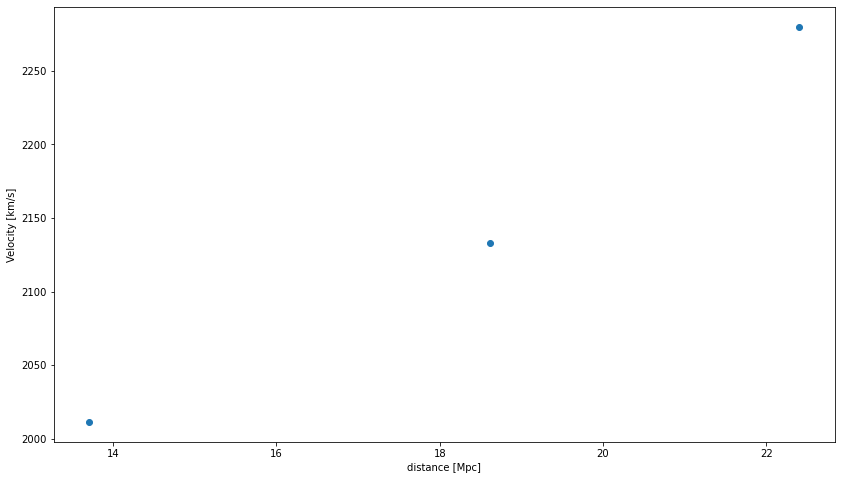

In [82]:
plt.plot(distance,v,'o')
plt.xlabel('distance [Mpc]')
plt.ylabel('Velocity [km/s]')
 
H0=1./slope
H0_error=1./slope**2 * dpopt[1]

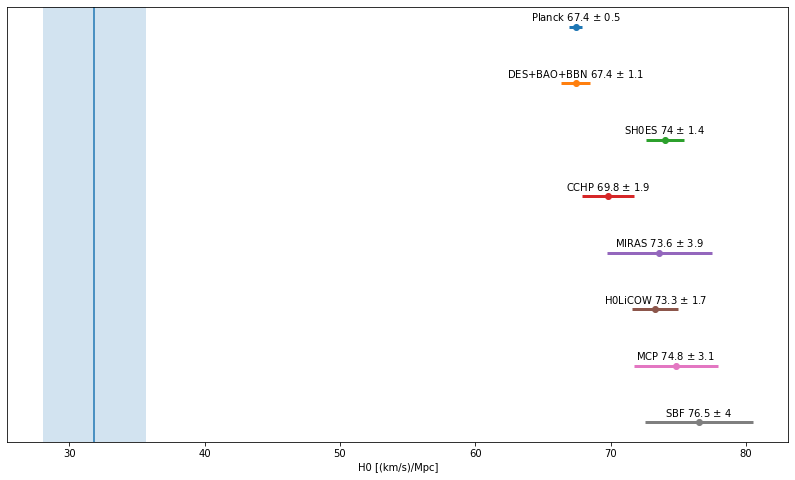

In [83]:
Hvals={"Planck":[67.4,0.5],
"DES+BAO+BBN":[67.4,1.1],
"SH0ES":[74,1.4],
"CCHP":[69.8,1.9],
"MIRAS":[73.6,3.9],
"H0LiCOW":[73.3,1.7],
"MCP":[74.8,3.1],
"SBF":[76.5,4],}
Y=10
for val in Hvals:
    Y=Y-1
    plt.text(Hvals[val][0],Y+0.1,val+f" {Hvals[val][0]} $\pm$ {Hvals[val][1]}",horizontalalignment="center")
    plt.errorbar(Hvals[val][0],Y,fmt='o',yerr=0,xerr=Hvals[val][1],linewidth=3)
plt.xlabel("H0 [(km/s)/Mpc]")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelleft=False)
plt.axvline(H0)
plt.axvspan(H0-H0_error,H0+H0_error,alpha=0.2)

In [37]:
#!!jupyter nbconvert *.ipynb --to html

["[W 17:30:04.277 NotebookApp] Unrecognized alias: 'to', it will have no effect.",
 '[C 17:30:04.278 NotebookApp] No such file or directory: /Users/kdasyra/Library/Mobile Documents/com~apple~CloudDocs/courses/lab/kormou/lab-spectroscopy/lab_kormou/galaxies/nbconvert']